In [37]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [38]:
database = pd.read_csv('Breast_GSE70947.csv')
database.head()

,samples,type,NM_144987,NM_013290,ENST00000322831,NM_001625,lincRNA:chr7:226042-232442_R,NM_032391,ENST00000238571,XR_108906,...,lincRNA:chr4:77860976-77869926_F,NM_152343,NM_001005327,NM_001039355,lincRNA:chr21:44456656-44468556_R,lincRNA:chr9:4869500-4896050_F,NM_016053,NM_001080425,ENST00000555638,ENST00000508993
0,GSM1823702_252800417016_S01_GE1_107_Sep09_1_2,normal,8.693318,7.718016,6.044438,10.747077,9.133777,4.735581,5.634732,4.670231,...,7.570363,6.368684,4.784042,10.747723,5.090500,5.994149,10.649336,8.969439,4.985693,5.090500
1,GSM1823703_252800417016_S01_GE1_107_Sep09_2_1,normal,9.375980,7.072232,6.976741,10.429671,9.526500,5.221089,5.425187,4.860931,...,7.903335,5.713115,4.421074,11.299200,4.447052,4.421074,10.746854,8.174489,4.464177,4.536891
2,GSM1823704_252800416877_S01_GE1_107_Sep09_2_3,normal,8.943442,7.964573,6.269055,10.825025,9.396855,5.258506,5.824921,4.964604,...,7.705765,6.595364,4.410870,10.576807,5.003699,6.529257,10.430034,8.473468,4.668447,5.084127
3,GSM1823705_252800416894_S01_GE1_107_Sep09_1_1,normal,9.020798,7.824639,6.165165,11.646788,8.776462,4.648655,6.676692,4.770186,...,6.633058,5.786781,4.572984,11.175090,4.990888,6.669871,11.110395,8.880818,4.537626,4.648655
4,GSM1823706_252800416894_S01_GE1_107_Sep09_1_3,normal,8.806154,7.555348,6.230969,11.635247,8.911383,4.518054,6.520691,4.540453,...,6.211581,5.538635,4.613828,12.014365,4.979883,6.414621,10.909805,9.526500,4.670490,4.613828


(array([146.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 143.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

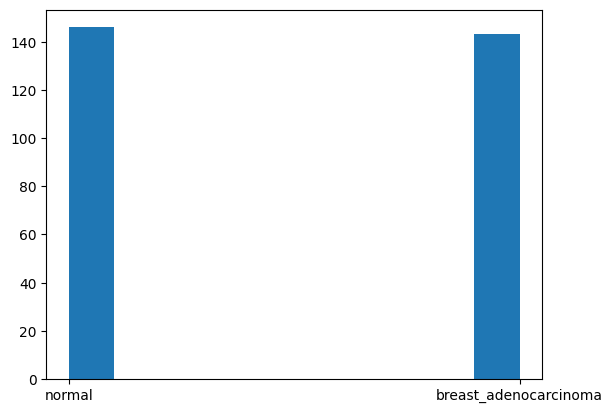

In [39]:
# visualizar a distribuição dos dados
plt.hist(database['type'], bins=10)

In [47]:
# separar os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(database.drop(['type','samples'], axis=1), database['type'], test_size=0.30, random_state=42)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((202, 35981), (87, 35981), (202,), (87,))

In [49]:
y_train.value_counts(), y_test.value_counts()

(type
 breast_adenocarcinoma    102
 normal                   100
 Name: count, dtype: int64,
 type
 normal                   46
 breast_adenocarcinoma    41
 Name: count, dtype: int64)

# Aprendizagem de Máquina - Árvores de Decisão

In [54]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [62]:
# encontrar quais são as features mais importantes e organizar em ordem decrescente
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 21273 (0.471883)
2. feature 1718 (0.173135)
3. feature 8919 (0.087835)
4. feature 9436 (0.079755)
5. feature 32411 (0.078039)
6. feature 7329 (0.058214)
7. feature 16795 (0.028715)
8. feature 1162 (0.022424)
9. feature 11987 (0.000000)
10. feature 11988 (0.000000)
11. feature 11989 (0.000000)
12. feature 11997 (0.000000)
13. feature 11991 (0.000000)
14. feature 11992 (0.000000)
15. feature 11993 (0.000000)
16. feature 11994 (0.000000)
17. feature 11995 (0.000000)
18. feature 11986 (0.000000)
19. feature 11985 (0.000000)
20. feature 11996 (0.000000)
21. feature 11990 (0.000000)
22. feature 35980 (0.000000)
23. feature 11998 (0.000000)
24. feature 12006 (0.000000)
25. feature 12012 (0.000000)
26. feature 12011 (0.000000)
27. feature 12010 (0.000000)
28. feature 12009 (0.000000)
29. feature 12008 (0.000000)
30. feature 12007 (0.000000)
31. feature 12005 (0.000000)
32. feature 11983 (0.000000)
33. feature 12004 (0.000000)
34. feature 12003 (0.000000)
35. feature

[Text(0.6, 0.9166666666666666, 'NM_199420 <= 5.985\nentropy = 1.0\nsamples = 202\nvalue = [102, 100]\nclass = Normal'),
 Text(0.4, 0.75, 'NM_175924 <= 14.779\nentropy = 0.682\nsamples = 116\nvalue = [21, 95]\nclass = Tumor'),
 Text(0.3, 0.5833333333333334, 'NM_138455 <= 9.945\nentropy = 0.425\nsamples = 104\nvalue = [9, 95]\nclass = Tumor'),
 Text(0.2, 0.4166666666666667, 'entropy = 0.0\nsamples = 74\nvalue = [0, 74]\nclass = Tumor'),
 Text(0.4, 0.4166666666666667, 'NM_018684 <= 9.05\nentropy = 0.881\nsamples = 30\nvalue = [9, 21]\nclass = Tumor'),
 Text(0.2, 0.25, 'ENST00000478313 <= 4.437\nentropy = 0.503\nsamples = 9\nvalue = [8, 1]\nclass = Normal'),
 Text(0.1, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Tumor'),
 Text(0.3, 0.08333333333333333, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = Normal'),
 Text(0.6, 0.25, 'lincRNA:chr6:29701971-29740296_R <= 5.734\nentropy = 0.276\nsamples = 21\nvalue = [1, 20]\nclass = Tumor'),
 Text(0.5, 0.083333333

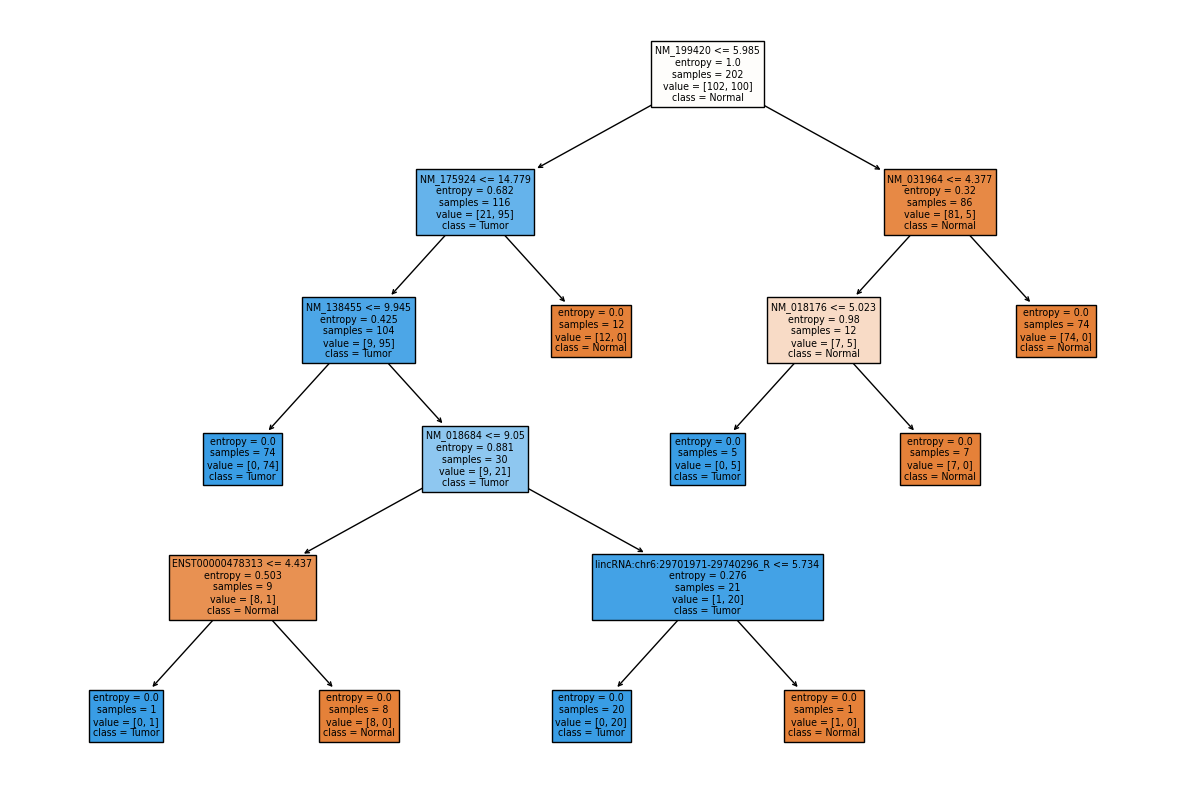

In [69]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,10))
tree.plot_tree(clf, class_names=['Normal', 'Tumor'], filled=True, feature_names=X_train.columns)

In [72]:
predictions = clf.predict(X_test)
predictions

array(['normal', 'breast_adenocarcinoma', 'breast_adenocarcinoma',
       'normal', 'breast_adenocarcinoma', 'normal', 'normal',
       'breast_adenocarcinoma', 'normal', 'breast_adenocarcinoma',
       'normal', 'normal', 'normal', 'breast_adenocarcinoma',
       'breast_adenocarcinoma', 'normal', 'normal',
       'breast_adenocarcinoma', 'breast_adenocarcinoma', 'normal',
       'breast_adenocarcinoma', 'normal', 'normal',
       'breast_adenocarcinoma', 'normal', 'breast_adenocarcinoma',
       'normal', 'breast_adenocarcinoma', 'breast_adenocarcinoma',
       'normal', 'breast_adenocarcinoma', 'breast_adenocarcinoma',
       'normal', 'breast_adenocarcinoma', 'breast_adenocarcinoma',
       'breast_adenocarcinoma', 'breast_adenocarcinoma', 'normal',
       'normal', 'breast_adenocarcinoma', 'normal', 'normal',
       'breast_adenocarcinoma', 'normal', 'normal', 'normal', 'normal',
       'breast_adenocarcinoma', 'breast_adenocarcinoma',
       'breast_adenocarcinoma', 'breast_adeno

In [71]:
y_test

45                    normal
157    breast_adenocarcinoma
274    breast_adenocarcinoma
42                    normal
181    breast_adenocarcinoma
               ...          
210    breast_adenocarcinoma
109                   normal
204    breast_adenocarcinoma
90                    normal
18                    normal
Name: type, Length: 87, dtype: object

In [77]:
from sklearn.metrics import accuracy_score, classification_report

In [76]:
accuracy_score(y_test, predictions)

0.8160919540229885

/home/elquias/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8160919540229885

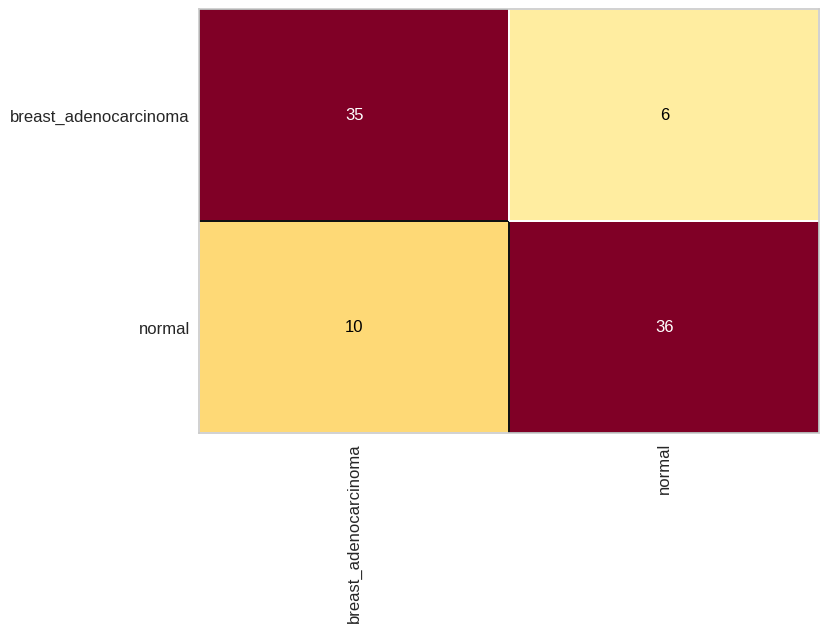

In [79]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(clf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [80]:
print(classification_report(y_test, predictions))

                       precision    recall  f1-score   support

breast_adenocarcinoma       0.78      0.85      0.81        41
               normal       0.86      0.78      0.82        46

             accuracy                           0.82        87
            macro avg       0.82      0.82      0.82        87
         weighted avg       0.82      0.82      0.82        87

